In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wandb
from IPython.display import display, Image

sns.set_theme()
api = wandb.Api()

In [2]:
df = []
for run in api.runs("baldassarrefe/miniproject"):
    for epoch, acc in run.history(x_axis="epoch", keys=["acc/val"]).itertuples(
        index=False
    ):
        df.append(
            {
                "name": run.name,
                "architecture": run.config["architecture/model"],
                "num_layers": run.config["architecture/num_layers"],
                "num_heads": run.config["architecture/num_heads"],
                "hidden_features": run.config["architecture/hidden_features"],
                "epoch": epoch,
                "accuracy": acc,
            }
        )
df = pd.DataFrame.from_records(df)
df.set_index(["name", "epoch"])

architecture  num_layers  num_heads  \
name                           epoch                                       
butterfly-of-awesome-upgrade   0              gat           2          4   
                               1              gat           2          4   
                               2              gat           2          4   
                               3              gat           2          4   
                               4              gat           2          4   
...                                           ...         ...        ...   
overjoyed-magnificent-oxpecker 10       performer           2          2   
                               11       performer           2          2   
                               12       performer           2          2   
                               13       performer           2          2   
                               14       performer           2          2   

                                      hidden_features  accuracy  
name                           epoch                             
butterfly-of-awesome-upgrade   0                   32  0.314438  
                               1                   32  0.600000  
                               2                   32  0.710695  
                               3                   32  0.731551  
                               4                   32  0.782353  
...                                               ...       ...  
overjoyed-magnificent-oxpecker 10                   8  0.917647  
                               11                   8  0.921390  
                               12                   8  0.931016  
                               13                   8  0.932086  
                               14                   8  0.945455  

[330 rows x 5 columns]

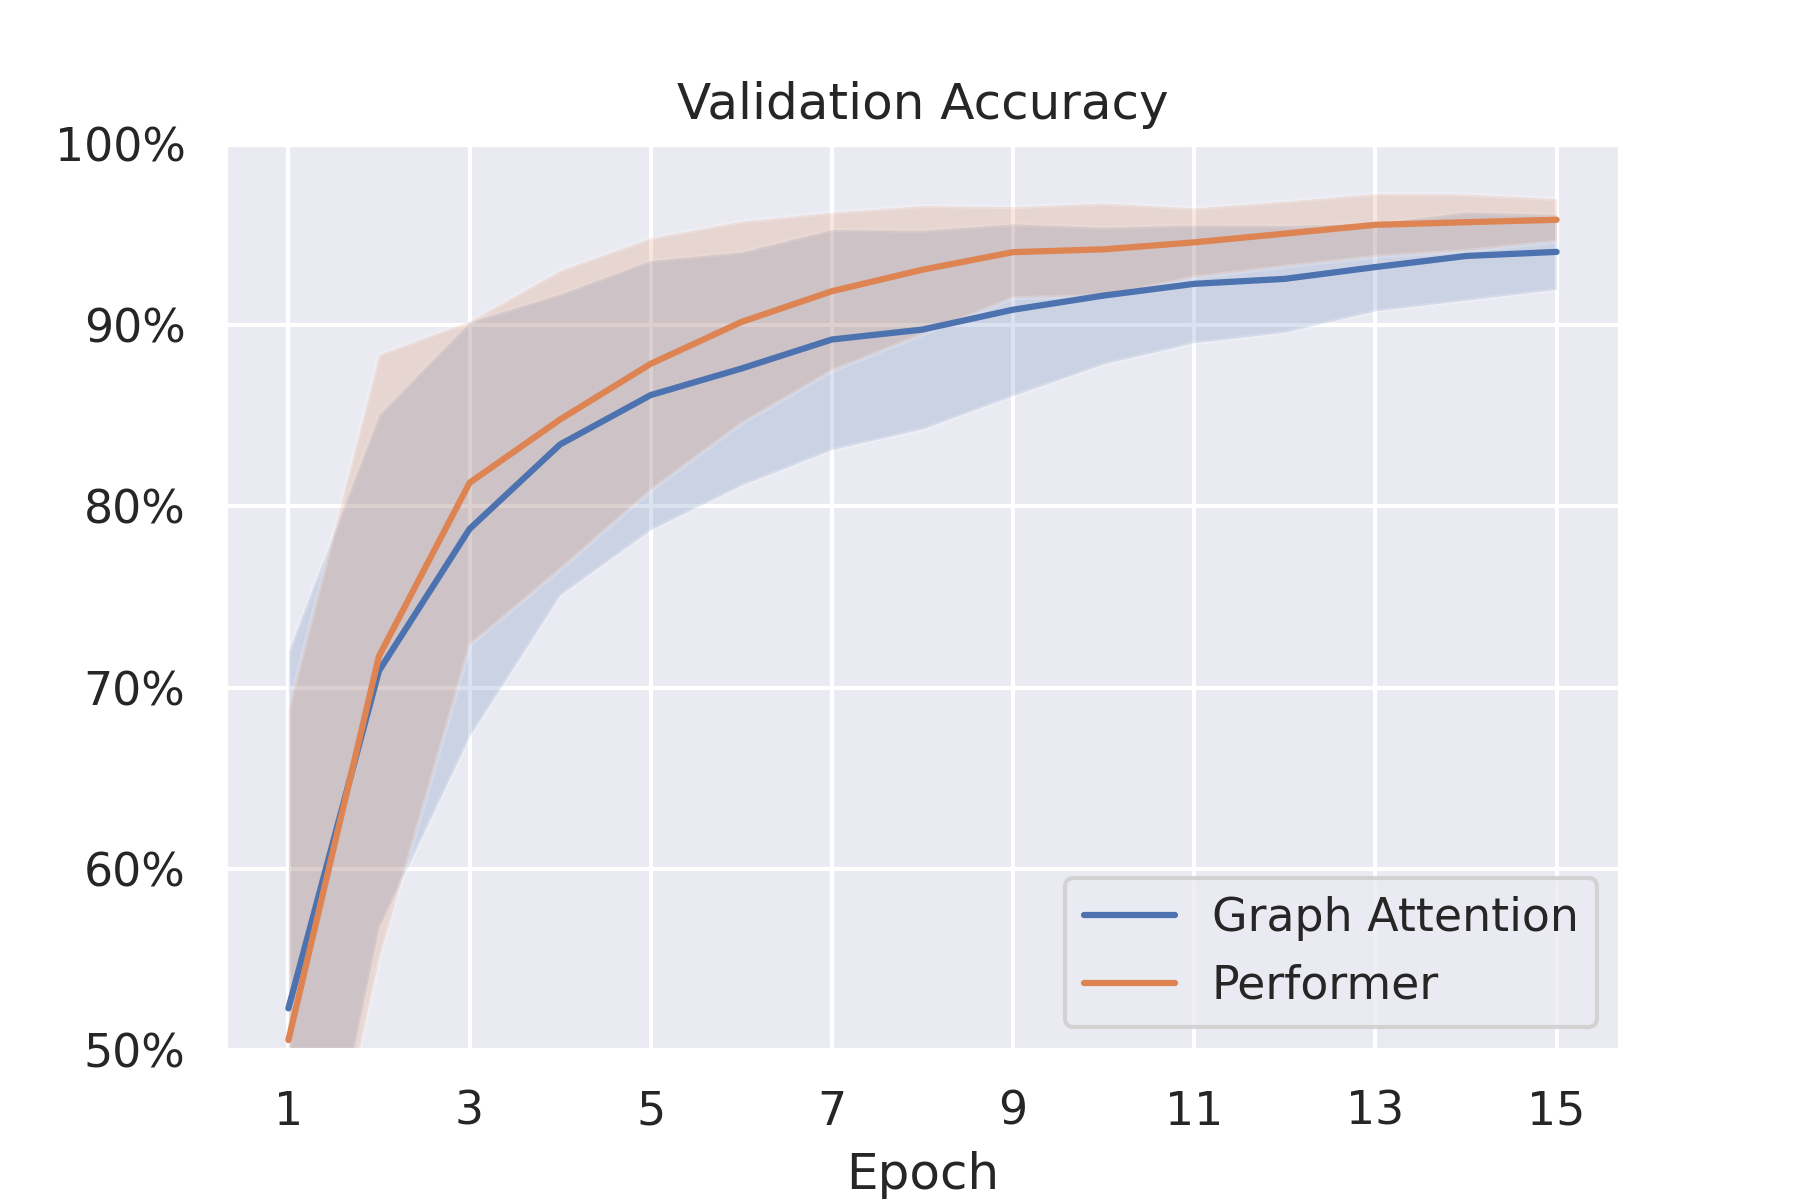

In [3]:
fig, ax = plt.subplots()
df_tmp = df.groupby(["architecture", "epoch"]).aggregate({"accuracy": ["mean", "std"]}).droplevel(axis=1, level=0)
ax.fill_between(df_tmp.loc['gat'].index, df_tmp.loc['gat', 'mean']-df_tmp.loc['gat', 'std'], df_tmp.loc['gat', 'mean']+df_tmp.loc['gat', 'std'], alpha=.2)
ax.plot(df_tmp.loc['gat'].index, df_tmp.loc['gat', 'mean'], label='Graph Attention')
ax.fill_between(df_tmp.loc['performer'].index, df_tmp.loc['performer', 'mean']-df_tmp.loc['performer', 'std'], df_tmp.loc['performer', 'mean']+df_tmp.loc['performer', 'std'], alpha=.2)
ax.plot(df_tmp.loc['performer'].index, df_tmp.loc['performer', 'mean'], label='Performer')
ax.legend(loc='lower right')
ax.set_title('Validation Accuracy')
ax.set_xlabel('Epoch')
ax.set_xticks(df_tmp.loc['gat'].index[::2])
ax.set_xticklabels([str(int(e+1)) for e in ax.get_xticks()])
ax.set_ylim(.5, 1)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1, decimals=0))

fig.savefig('validation_accuracy.png', dpi=300)
plt.close(fig)
display(Image('validation_accuracy.png', width=600))